In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
tf.reset_default_graph
image=tf.placeholder(tf.float32,shape=[None,28*28])

In [4]:
dense1=tf.layers.dense(image,units=12*12)

dense3=tf.layers.dense(dense1,units=10*10)

image_o=tf.layers.dense(dense3,units=28*28,activation=tf.nn.sigmoid)

print(dense1)

print(image_o)


Tensor("dense/BiasAdd:0", shape=(?, 144), dtype=float32)
Tensor("dense_3/Sigmoid:0", shape=(?, 784), dtype=float32)


In [5]:
loss=tf.reduce_mean(tf.losses.log_loss(predictions=image_o,labels=image))

In [6]:
optimizer=tf.train.GradientDescentOptimizer(1).minimize(loss)

In [7]:
sess=tf.InteractiveSession()
tf.initialize_all_variables().run()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


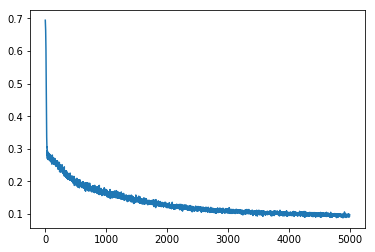

In [ ]:
epoch=5000
x=[]
y=[]
for e in range(epoch):
    images,labels=mnist.train.next_batch(100)
    _,lo,i=sess.run([optimizer,loss,image_o],feed_dict={image:images})
    x.append(e)
    y.append(lo)
plt.plot(x,y)
plt.show()

In [ ]:
#Enter a Random Number between 0 and 99 to find the generated images
index=int(input())
image_ori=np.reshape(images[index],[28,28])
image_out=np.reshape(i[index],[28,28])
fig,axes=plt.subplots(1,2)
axes[0].imshow(image_ori)
axes[1].imshow(image_out)
